# An Analysis of Marketing Metrics
## And Their Impact on Actual Sales Numbers

## Table of Contents<a id='back to top'></a>

1. [Libraries](#link1)
1. [Load Data](#link2)
1. [Clean The Data](#link3)
1. [Exploring The Data](#link4)
1. [Model Development](#link5)
1. [Model Interpretation](#link6)

# Libraries<a id='link1'></a>
[Back to Top](#back to top)

In [6]:
# Data Architecture
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt; %matplotlib inline
import seaborn as sns; sns.set()

# Model Building
import statsmodels.formula.api as smf

# Load Data<a id='link2'></a>
[Back to Top](#back to top)

In [7]:
data = pd.read_csv("data.csv"); data.head()

,Week,Constant,Sales,Average_Price,Sales Units,TV GRP,Display Impressions,Search Clicks,Distribution (ACV),Price Reduction Units,Trade Promotions Units,Seasonality,CPI,Coupons
0,1,2000000.0,"$2,112,912",$3.03,"697,331",75,"51,519","10,655",52,53,84,91,88,"1,000,000"
1,2,NaN,"$2,170,007",$2.99,"725,755",107,"89,193","15,214",73,93,92,60,74,-
2,3,NaN,"$2,284,844",$2.90,"787,877",98,"65,084","18,146",60,57,56,67,98,-
3,4,NaN,"$2,257,913",$3.03,"745,186",149,"55,083","19,640",93,75,81,71,69,-
4,5,NaN,"$2,257,829",$3.05,"740,272",108,"50,503","17,747",57,95,88,82,75,-


# Clean The Data<a id='link3'></a>
[Back to Top](#back to top)

In [8]:
# Drop a couple of columns
columns_to_drop = ['Week','Constant','Sales']
data = data.drop(columns_to_drop, axis=1)


# Convert data types to int64 where appropriate
data['Average_Price'] = pd.to_numeric(data['Average_Price'].str.replace('$', ''))
data['Sales Units'] = pd.to_numeric(data['Sales Units'].str.replace(',', ''))
data['Display Impressions'] = pd.to_numeric(data['Display Impressions'].str.replace(',', ''))
data['Search Clicks'] = pd.to_numeric(data['Search Clicks'].str.replace(',', ''))
data['Coupons'] = np.where(data['Coupons'].str.contains('-'),0,data['Coupons'])


# rename some column headings so there are no spaces and easier to reference
data = data.rename(index=str, columns={"Sales Units": "Sales_Units"})
data = data.rename(index=str, columns={"TV GRP": "TV_GRP"})
data = data.rename(index=str, columns={"Display Impressions": "Display_Impressions"})
data = data.rename(index=str, columns={"Search Clicks": "Search_Clicks"})
data = data.rename(index=str, columns={"Distribution (ACV)": "Distribution_ACV"})
data = data.rename(index=str, columns={"Price Reduction Units": "Price_Reduction_Units"})
data = data.rename(index=str, columns={"Trade Promotions Units": "Trade_Promotions_Units"})

data.head()

,Average_Price,Sales_Units,TV_GRP,Display_Impressions,Search_Clicks,Distribution_ACV,Price_Reduction_Units,Trade_Promotions_Units,Seasonality,CPI,Coupons
0,3.03,697331,75,51519,10655,52,53,84,91,88,"1,000,000"
1,2.99,725755,107,89193,15214,73,93,92,60,74,0
2,2.90,787877,98,65084,18146,60,57,56,67,98,0
3,3.03,745186,149,55083,19640,93,75,81,71,69,0
4,3.05,740272,108,50503,17747,57,95,88,82,75,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 29
Data columns (total 11 columns):
Average_Price             30 non-null float64
Sales_Units               30 non-null int64
TV_GRP                    30 non-null int64
Display_Impressions       30 non-null int64
Search_Clicks             30 non-null int64
Distribution_ACV          30 non-null int64
Price_Reduction_Units     30 non-null int64
Trade_Promotions_Units    30 non-null int64
Seasonality               30 non-null int64
CPI                       30 non-null int64
Coupons                   30 non-null object
dtypes: float64(1), int64(9), object(1)
memory usage: 2.8+ KB


# Explore The Data<a id='link4'></a>
[Back to Top](#back to top)

### Description of Input Variables
* Average_Price
    * This variable represents the average price of the product across all product categories & UPCs.
* Sales_Units
    * This variable represents the sales measured in units sold on a weekly basis.
* TV_GRP
    * This variable represents the weekly GRPs for TV bought by the brand. The GRPs can be translated into impressions using the following conversion rate: 1 GRP = 1,200,000 impressions.
* Display_Impressions
    * The variable represents the weekly ad impressions for the brand through banner ads on websites or mobile phone apps.
* Search_Clicks
    * This variable represents the paid search advertisement done by the brand on Google and Bing. The metric measures the clicks done by users on the ads.
* Distribution_ACV
    * This variable is an index variable that represents the comparative distribution levels of a product across various weeks of data. An index of 100 implies the maximum distribution of the product. All other distribution numbers are scaled down based on a maximum distribution of 100.
* Price_Reduction_Units
    * This variable is an index variable that represents the temporary price reduction levels of a product across various weeks of data. An index of 100 implies the maximum number of units under temporary price reductions of the product. 
* Trade_Promotions_Units
    * This variable is an index variable that represents the Trade Promotions levels of a product across various weeks of data. An index of 100 implies the maximum number of units under trade promotions for the product. 
* Seasonality
    * This variable is an index variable that represents the seasonality associated with the consumer demand for this product.
* CPI
    * This variable is an index variable that represents the Consumer Price Index for this product's market. The CPI variable represents the cost of essential goods for an average household.
* Coupons
    * The coupons represents various weeks where the manufacturer circulate coupons at various retail outlets where this product is sold. These coupons are typically valid for a duration o 4 - 8 weeks.

In [10]:
data.describe()

,Average_Price,Sales_Units,TV_GRP,Display_Impressions,Search_Clicks,Distribution_ACV,Price_Reduction_Units,Trade_Promotions_Units,Seasonality,CPI
count,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2.97300,746931.033333,72.300000,68353.366667,15554.800000,73.100000,76.033333,76.833333,71.000000,76.566667
std,0.05497,37865.227702,55.589722,15337.845224,3084.027465,13.321877,17.418744,13.926119,12.608153,12.190113
min,2.87000,643573.000000,0.000000,50503.000000,10391.000000,52.000000,51.000000,50.000000,50.000000,51.000000
25%,2.93000,724758.250000,0.000000,53119.250000,12844.000000,62.000000,58.500000,67.500000,63.000000,69.500000
50%,2.99000,753556.000000,80.000000,64913.000000,15471.500000,73.000000,77.500000,80.500000,67.500000,77.500000
75%,3.01750,762695.000000,116.750000,77622.750000,18069.750000,82.750000,93.000000,88.000000,80.500000,82.750000
max,3.05000,805646.000000,149.000000,98469.000000,19970.000000,100.000000,100.000000,95.000000,94.000000,98.000000


### Distributions of Key Variables

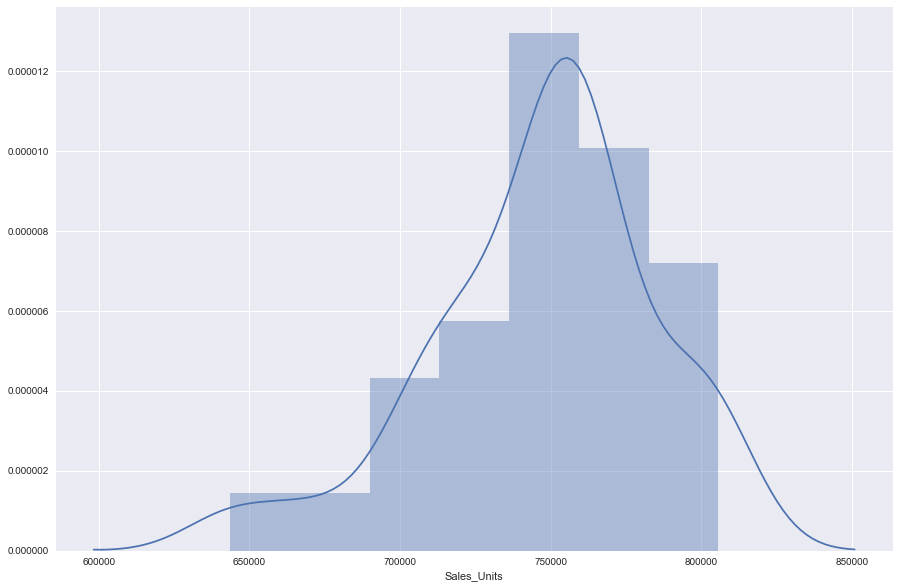

In [89]:
# Sales_Units
plt.subplots(figsize=(15,10))
sns.distplot(data['Sales_Units'])
plt.show()

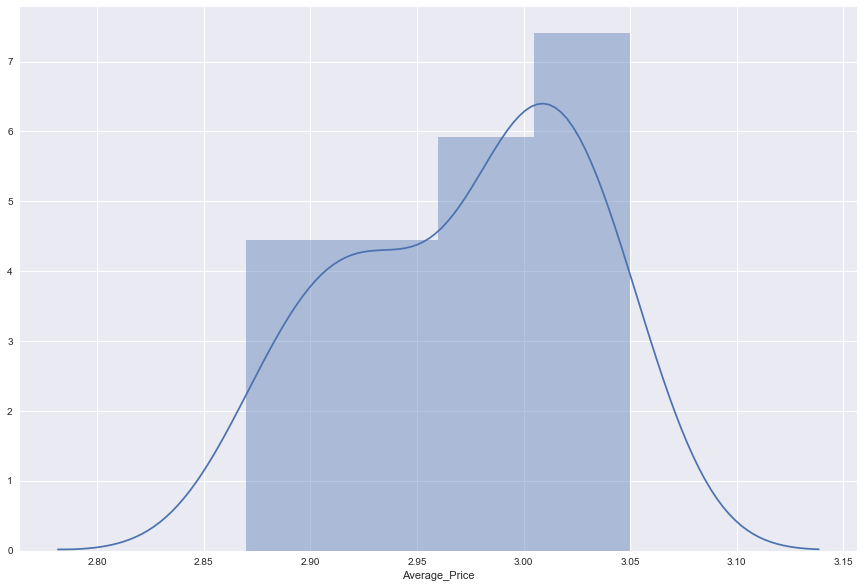

In [90]:
# Average_Price
plt.subplots(figsize=(15,10))
sns.distplot(data['Average_Price'])
plt.show()

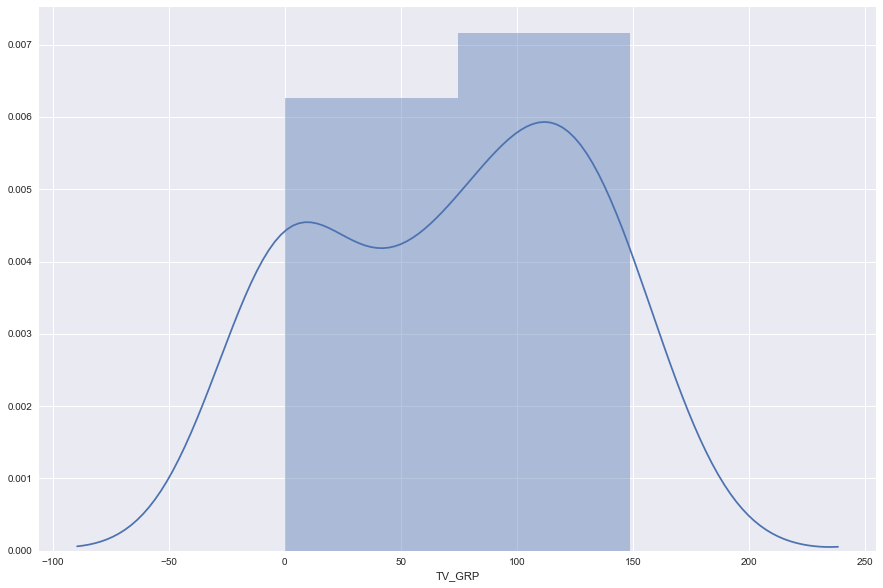

In [91]:
# TV_GRP
plt.subplots(figsize=(15,10))
sns.distplot(data['TV_GRP'])
plt.show()

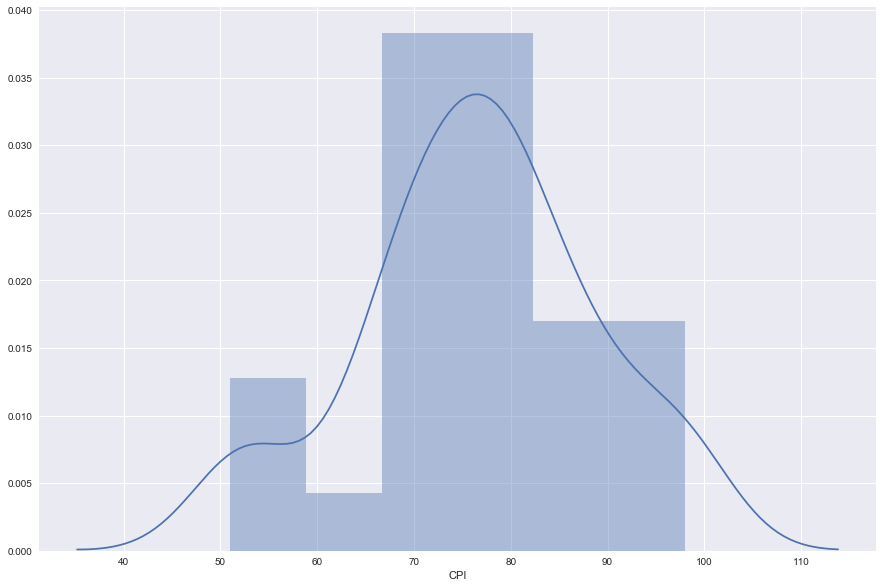

In [92]:
# CPI
plt.subplots(figsize=(15,10))
sns.distplot(data['CPI'])
plt.show()

### Correlation Heatmap

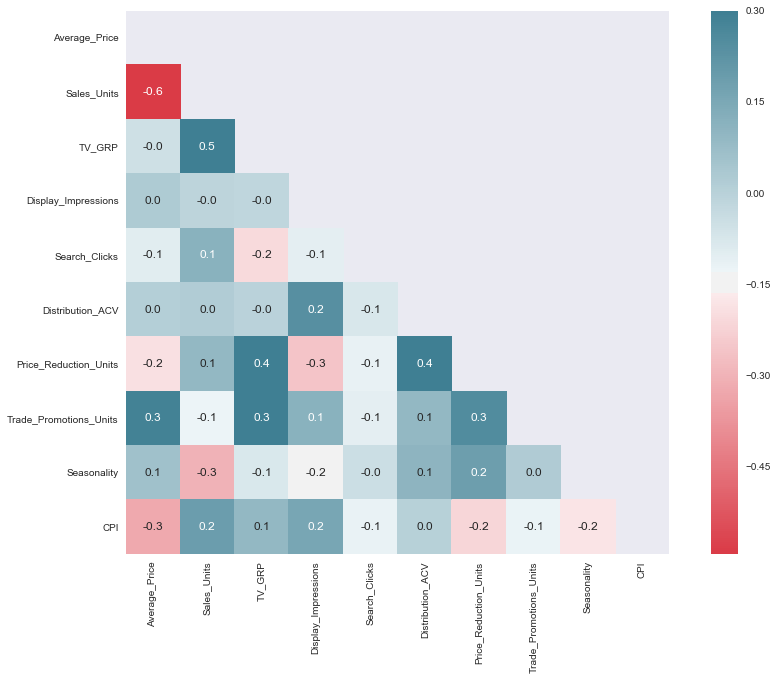

In [68]:
data_corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(10, 220, as_cmap=True)
plt.subplots(figsize=(15,10))
with sns.axes_style("white"):
    ax = sns.heatmap(data_corr, mask=mask, cmap=cmap, vmax=.3, square=True,annot=True, fmt=".1f")

Sales_Units doesn't have any very strong correlations, but the strongest are these 3, which we will visualize in more detail:
* Average_Price
* TV_GRP
* Seasonality
* CPI

### Correlation Scatter Plots

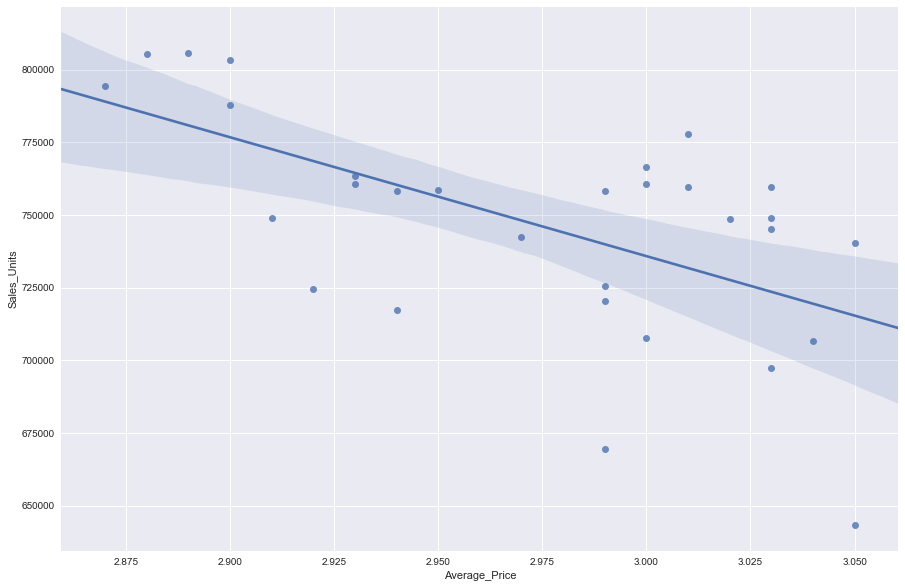

In [76]:
# Average_Price scatter plot
plt.subplots(figsize=(15,10))
sns.regplot(x=data["Average_Price"], y=data["Sales_Units"])
plt.show()

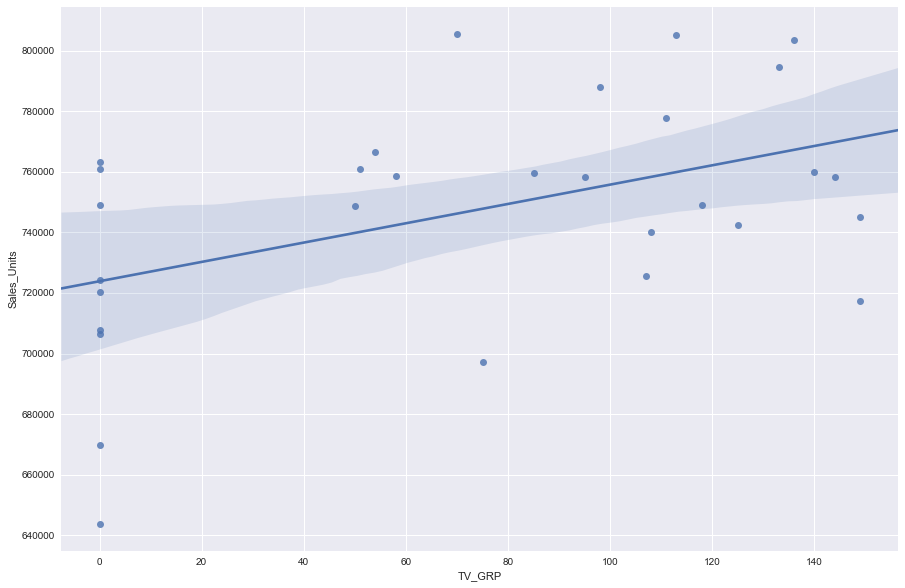

In [78]:
# TV_GRP scatter plot
plt.subplots(figsize=(15,10))
sns.regplot(x=data["TV_GRP"], y=data["Sales_Units"])
plt.show()

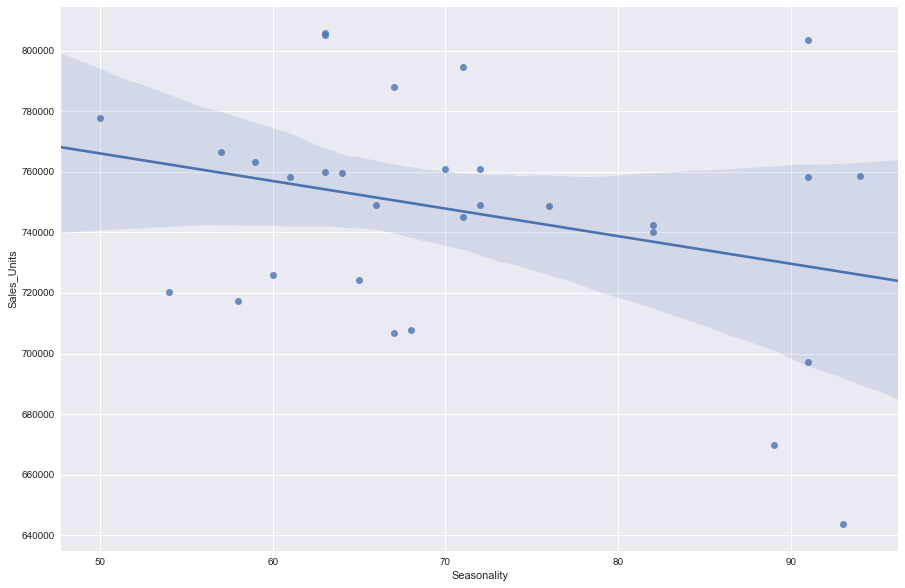

In [79]:
# Seasonality scatter plot
plt.subplots(figsize=(15,10))
sns.regplot(x=data["Seasonality"], y=data["Sales_Units"])
plt.show()

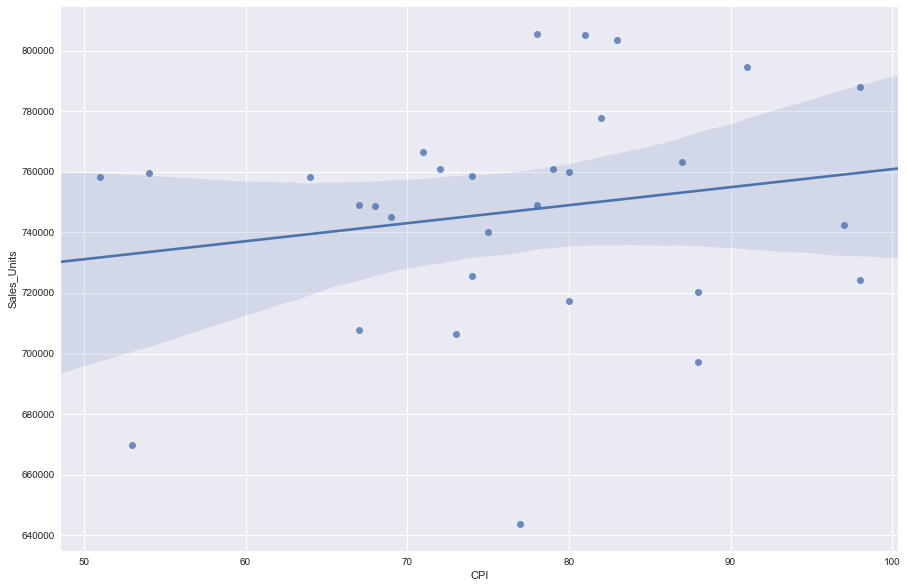

In [80]:
# CPI scatter plot
plt.subplots(figsize=(15,10))
sns.regplot(x=data["CPI"], y=data["Sales_Units"])
plt.show()

### 

# Model Development<a id='link5'></a>
[Back to Top](#back to top)

We're building out a linear regression using OLS. To start, here is a brief description of OLS and the rationale for using it in this situation:
* [insert compelling rationale here]

We use the statsmodels package in python for this example, although you're more than welcome to use the scikit learn LinearRegression package, which is just as effective. The reason for our selection is because the statsmodels output can be formatted into the classic summary output that many readers are used to.

### Model 1
Explanatory variables
* Everything and the kitchen sink

Results
* The adjusted R-squared is very low (0.526), and only two of the coefficients have P values that come close to being significant.

In [15]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm1 = smf.ols(formula='Sales_Units ~ Average_Price + TV_GRP + Display_Impressions + Search_Clicks + Distribution_ACV + Price_Reduction_Units + Trade_Promotions_Units + Seasonality + CPI + Coupons', data=data).fit()

# print the coefficients
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:            Sales_Units   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     4.219
Date:                Wed, 11 Apr 2018   Prob (F-statistic):            0.00342
Time:                        21:44:00   Log-Likelihood:                -340.77
No. Observations:                  30   AIC:                             703.5
Df Residuals:                      19   BIC:                             719.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                2.1

### Model 2
Explanatory Variables: These variables were selected because they had the strongest correlations with the dependent variable of Sales Units
* Average Price
* TV_GRP
* Seasonality
* CPI

Results:
* Our adjusted R-squared has increased very slightly from the previous model, but it is still very low.
* CPI's P value is large, so it cannot reject the null hypothesis that the coefficient could be 0

In [86]:
# remove variables whose p values are too large, and thus insignificant at any reasonable level of significance
lm2 = smf.ols(formula='Sales_Units ~ Average_Price + TV_GRP + Seasonality + CPI', data=data).fit()

print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:            Sales_Units   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     9.632
Date:                Thu, 12 Apr 2018   Prob (F-statistic):           7.43e-05
Time:                        00:14:03   Log-Likelihood:                -344.32
No. Observations:                  30   AIC:                             698.6
Df Residuals:                      25   BIC:                             705.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.994e+06   2.85e+05      6.990

# Model Interpretation<a id='link6'></a>
[Back to Top](#back to top)